<a href="https://colab.research.google.com/github/jineetd/HPC-analysis/blob/dev/MLP_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/Power Model Inputs (964 datasets).csv')
print(df.columns)

Index(['m', 'Benchmark', 'Kernel Name', 'C/M', 'reg_thread', 'Smem_pblock',
       'No_of_cmpinst', 'No_of_globinst', 'No_of_sharinst', 'Miscelleneous ',
       'No_of_blocks(Grid Size)', 'Threads_pbl (Block Size)', 'Occupancy',
       'Power', 'Dwarf Type', 'Unnamed: 15'],
      dtype='object')


In [0]:
df1=df.drop(['m','Benchmark','Kernel Name','C/M','Dwarf Type','Unnamed: 15'],axis=1)

In [0]:
df2=df1.iloc[0:963,:]
print(df2.shape)
df2

In [5]:
y_train=df2['Power']
y_train=np.array(y_train).astype('float32')
y_train.shape

(963,)

In [6]:
x_train=df2.iloc[:,0:9]
x_train=np.array(x_train).astype('float32')
x_train

array([[1.200e+01, 0.000e+00, 1.400e+01, ..., 6.400e+01, 2.560e+02,
        1.000e+00],
       [1.200e+01, 0.000e+00, 1.400e+01, ..., 1.280e+02, 2.560e+02,
        1.000e+00],
       [1.300e+01, 0.000e+00, 1.300e+01, ..., 1.024e+03, 1.600e+01,
        2.500e-01],
       ...,
       [8.000e+00, 0.000e+00, 0.000e+00, ..., 1.024e+03, 2.560e+02,
        1.000e+00],
       [8.000e+00, 0.000e+00, 0.000e+00, ..., 1.024e+03, 1.024e+03,
        1.000e+00],
       [8.000e+00, 0.000e+00, 0.000e+00, ..., 1.024e+03, 3.200e+01,
        2.500e-01]], dtype=float32)

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x_train)
print(X_scale.shape)

(963, 9)


In [8]:
#splitting the data for training and validation test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y_train, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(770, 9)
(193, 9)
(770,)
(193,)


In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(64,64,64,64),
              learning_rate='constant', learning_rate_init=0.003,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Y_train=Y_train.astype('float64')
clf.fit(X_train,Y_train)

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 64, 64, 64), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
clf.predict(X_test)

array([ 65.,  65., 107., 113., 118., 116.,  64.,  69., 125.,  53.,  65.,
       117., 132.,  87.,  83., 112.,  57., 117.,  54.,  77., 125., 118.,
        62., 115.,  56.,  64.,  83.,  78., 109., 139., 112.,  54., 117.,
        65.,  80.,  74.,  70.,  64., 113.,  63., 117.,  64.,  78.,  56.,
        55.,  64., 111.,  65.,  64.,  66., 118.,  74.,  56.,  55.,  65.,
        64.,  69.,  62.,  95.,  68., 116.,  70., 117.,  71.,  87.,  64.,
       110.,  65., 115., 115.,  64.,  70.,  88.,  63., 118.,  76.,  61.,
       112., 107.,  62., 130., 125.,  67.,  64., 113.,  64.,  57.,  64.,
        76.,  84.,  91., 117.,  62., 103.,  83., 113.,  62., 110., 118.,
        74.,  65., 111.,  53., 118.,  91.,  53.,  80.,  66.,  65.,  90.,
       113., 115.,  85.,  64., 113.,  56.,  56., 111., 110., 117., 104.,
        77.,  76.,  77.,  54.,  71., 113.,  54.,  64., 117., 117.,  88.,
        91.,  56.,  56.,  64.,  62.,  54.,  62.,  65.,  94.,  66.,  62.,
        62., 111., 136., 117.,  60.,  64.,  53.,  7

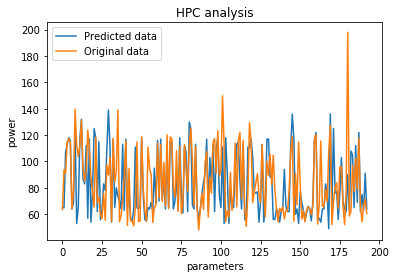

In [13]:
pred=clf.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(pred,label='Predicted data')
plt.plot(Y_test,label='Original data')
plt.legend(loc='best')
plt.ylabel('power')
plt.xlabel('parameters')
plt.title('HPC analysis')
plt.show()

In [14]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test,pred))
print(rms)

0.116658968548496
23.671733577100852
